In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl

<div dir="rtl"> 
    
##     חשיפה לסיכון

<div dir="rtl"> אם תוחלת מספר אירועי בטיחות בכביש מסוים הוא 12 בשנה?  מה היא תוחלת מספר אירועי הבטיחות בכביש זה בחודש?   (בהנחה שהתוחלת בכל אחד מהחודשים זהה)
אם תוחלת מספר הנדבקים ליום היא 10? מה תהיה תוחלת מספר הנדבקים בשבוע?

<div dir="rtl"> 
לפעמים נוח להסתכל על תוחלת מספר אירועי הבטיחות ליחידת זמן/שטח במקום על ספירה של מספר האירועים

    
<div dir="rtl"> 
לדוגמא - בתקופת הסגרים בקורונה יייתכן שהיו פחות תאונות דרכים. האם זו תוצאה של שיפור בבטיחות או שינוי בחשיפה? אם נבדוק את הארועים לקילומטר נסיעה לפני הסגרים ואחריהם נגלה שאין שינוי אמיתי בבטיחות. 

<div dir="rtl">  למשל נראה בגרף למטה את מספר ההרוגים בתאונות דרכים במדינה לנסועה. נסועה זה מדד המתאר את מספר ההורגים בשנה של סך הכל הק"מ של כלל הכרבים במהלך השנה. לפני הדרף ניתן לראות כי יש ירידה, לעומת זאת מספר ההרוגים האבסולוטי דווקא עולה. לכן אמנם יש יותר הרוגים רמת הבטיחות עלתה כי יש יותר חשיפה לסיכון. יש ל 

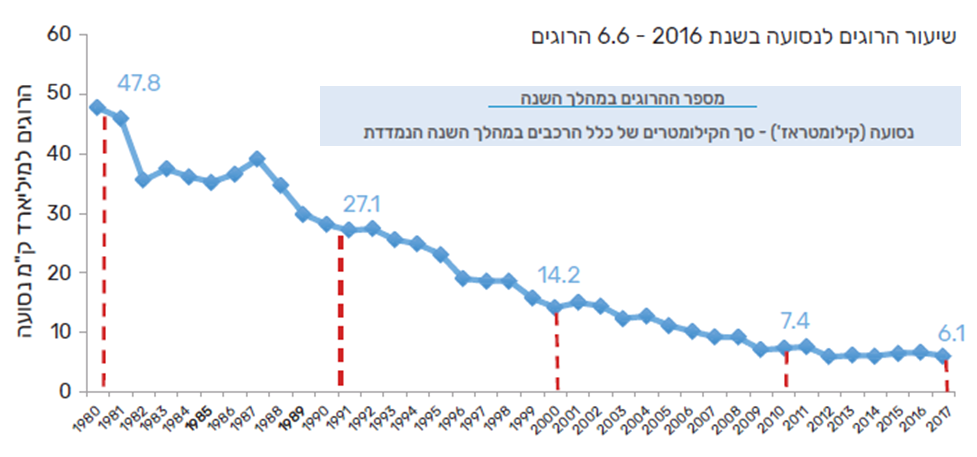

<div dir="rtl">  

## דוגמא:

<div dir="rtl">
הקשר בין מספר התאונות למייל ובין ממוצע מספר הרכבים על הכביש
<div dir="rtl">
דוגמא זו מציגה את מספר התאונות ב -5323 קטעי כביש בקולורדו בין השנים 1986-1998



In [86]:
## The path to the file
path = r'..\Data'
file_name = 'From Ezra Haur chapter 9.csv'

In [87]:
## Extracting the data from the csv file into pandas
data = pd.read_csv(os.path.join(path, file_name))
data.head(5)

,Segment,Accidents,Miles,AADT
0,1,0,1.50,60.307692
1,2,0,2.90,100.000000
2,3,0,1.49,100.000000
3,4,0,0.39,100.000000
4,5,0,3.89,100.000000


<div dir="rtl">
Accidents – תאונות בשנים הנחקרות במקטע כביש הנחקר
<div dir="rtl">
Miles – אורך מקטע הכביש
<div dir="rtl">
(AADT) Annual Average Daily Traffic ממוצע שנתי של תנועה


<div dir="rtl"> נעשה bucketing עבור 1000 יחידות:

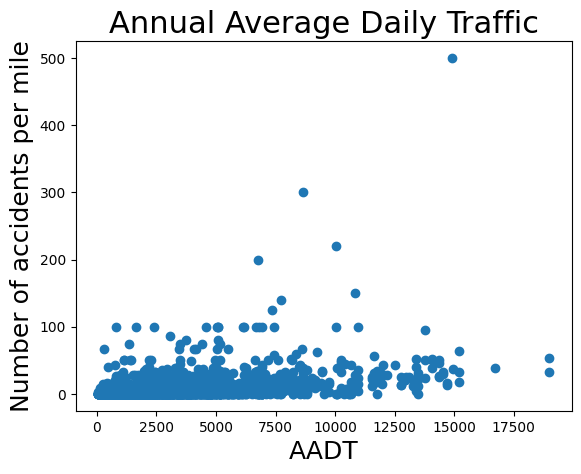

In [51]:
plt.figure()
plt.scatter(data['AADT'], data['Accidents ']/data['Miles'])
plt.xlabel('AADT', fontsize = 18)
plt.ylabel('Number of accidents per mile', fontsize = 18)
plt.title('Annual Average Daily Traffic', fontsize = 22)
plt.show()

In [6]:
data['AADT_1000'] = data['AADT'].round(-3) + 1000 

<div dir="rtl"> נכין dataframe עבור הנתונים החדשים

In [53]:
df = pd.DataFrame(data.groupby('AADT_1000').mean())

<div dir="rtl"> נסדר את הנתונים כך שכל נקודה זה הממוצע של כל הערכים ב1000 AADT הקרובים

In [57]:
new_data = pd.DataFrame([])
new_data['AADT_1000'] = np.array(data['AADT_1000'].unique())
new_data['Accidents'] = np.array(df['Accidents '])
new_data['Miles'] = np.array(df['Miles'])
new_data['intercept'] = np.ones(new_data.shape[0])
new_data['log_AADT_1000'] = np.log(np.array(data['AADT_1000'].unique()))
new_data['Accidents_per_mile'] = new_data['Accidents']/new_data['Miles'] 
new_data.head()

,AADT_1000,Accidents,Miles,intercept,log_AADT_1000,Accidents_per_mile
0,1000.0,1.464625,1.601711,1.0,6.907755,0.914413
1,2000.0,2.433033,1.254876,1.0,7.600902,1.938864
2,3000.0,4.171039,1.024680,1.0,8.006368,4.070577
3,4000.0,6.393822,0.915792,1.0,8.294050,6.981745
4,5000.0,6.967914,0.811551,1.0,8.517193,8.585925


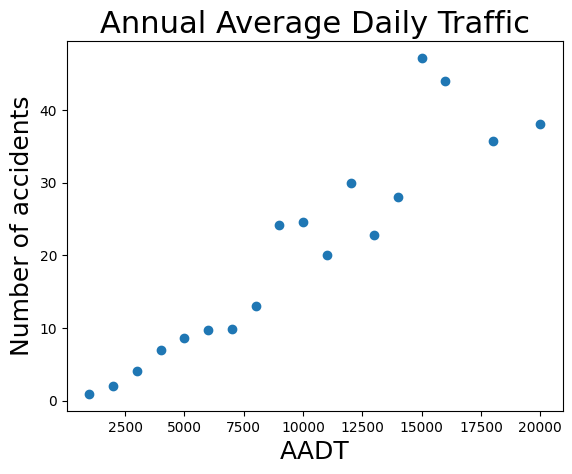

In [58]:
plt.figure()
plt.scatter(new_data['AADT_1000'], new_data['Accidents_per_mile'] )
plt.xlabel('AADT', fontsize = 18)
plt.ylabel('Number of accidents', fontsize = 18)
plt.title('Annual Average Daily Traffic', fontsize = 22)
plt.show()

<div dir="rtl"> נתחיל קודם עם רגרסיה ליניארית:

In [161]:
# Create a linear regression model
model = sm.OLS(new_data['Accidents_per_mile'], new_data[['intercept', 'AADT_1000']])
# Fit the model
results = model.fit()
# Print summary statistics, including p-values for each coefficient
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:     Accidents_per_mile   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     103.5
Date:                Sun, 29 Oct 2023   Prob (F-statistic):           2.16e-08
Time:                        09:04:31   Log-Likelihood:                -55.134
No. Observations:                  18   AIC:                             114.3
Df Residuals:                      16   BIC:                             116.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.7285      2.629     -1.038      0.3

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\scipy\stats\_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [163]:
preds_df = pd.DataFrame([])
preds_df['AADT_1000'] = new_data['AADT_1000'] 
preds_df['intercept'] = np.ones(new_data['AADT_1000'].shape[0])
preds_df['Accidents_per_mile'] =  results.predict(preds_df[['intercept', 'AADT_1000']])


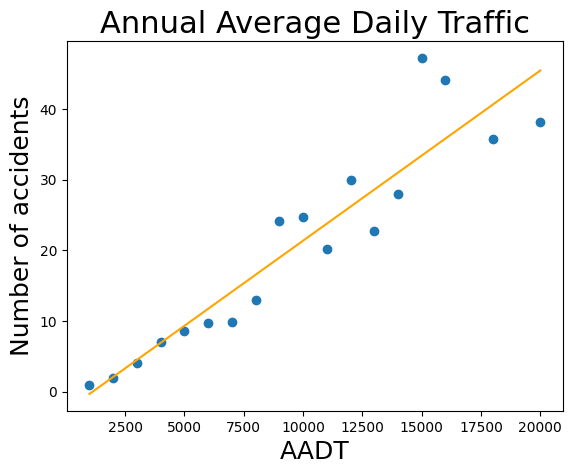

In [164]:
plt.figure()
plt.scatter(new_data['AADT_1000'], new_data['Accidents_per_mile'] )
plt.plot(preds_df['AADT_1000'], preds_df['Accidents_per_mile'], color = 'orange')
plt.xlabel('AADT', fontsize = 18)
plt.ylabel('Number of accidents', fontsize = 18)
plt.title('Annual Average Daily Traffic', fontsize = 22)
plt.show()

<div dir="rtl"> לפי הגרף למעלה נראה כי השונות של השגיאות גדלה עם הזמן. זה מפר את הנחת שיווין שונויות. נוכל לראות את זה גם בגרף למטה המתאר את השגיאות בצורה מפורשת.

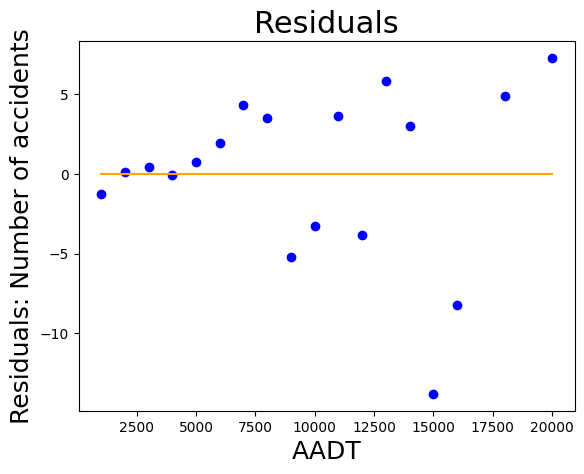

In [169]:
plt.figure()
# plt.scatter(new_data['AADT_1000'], new_data['Accidents_per_mile'] )
plt.scatter(preds_df['AADT_1000'], preds_df['Accidents_per_mile']-new_data['Accidents_per_mile'], color = 'blue')
plt.plot(preds_df['AADT_1000'], np.zeros(preds_df['Accidents_per_mile'].shape[0]), color = 'orange')
plt.xlabel('AADT', fontsize = 18)
plt.ylabel('Residuals: Number of accidents', fontsize = 18)
plt.title('Residuals', fontsize = 22)
plt.show()

<div dir="rtl"> נעשה את הגרף הבא המתאר את תוחלת מספר התאונות כפונקציה של מספר השונות. נראה כי יש קשר ישיר בינהם. זה דבר אופייני לנתונים המתארים מניה של מספר ארועים. 
     מה שמוביל אותנו לרגריסה פואוסנית כפי שיוסבר למטה.

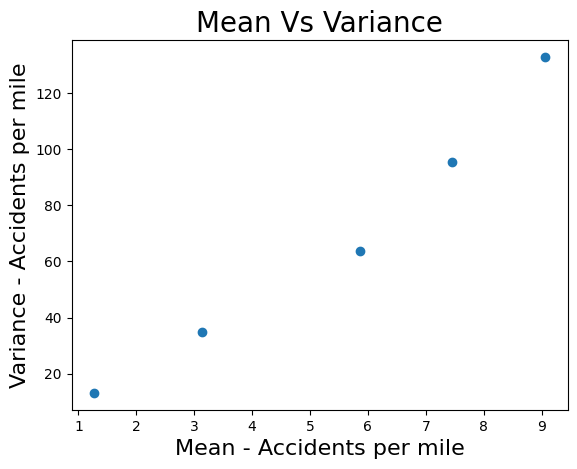

In [170]:
vars_ = []
means = []
for bucket in range(15):
    curr_df  = data.loc[(data['AADT']>bucket*1000)&(data['AADT']<(bucket+1)*1000), :]
    if curr_df.shape[0] > 200:
        vars_.append((curr_df['Accidents ']/curr_df['Miles']).var())
        means.append((curr_df['Accidents ']/curr_df['Miles']).mean())


plt.figure()
plt.scatter(means,vars_)
plt.xlabel('Mean - Accidents per mile', fontsize = 16)
plt.ylabel('Variance - Accidents per mile', fontsize = 16)
plt.title('Mean Vs Variance', fontsize = 20)
plt.show()

<div dir="rtl"> 
    
## Poisson regression רגרסיה פואסונית

<div dir="rtl">  רגרסיה ליניארית התחזית היא עבור מספר רציף ואילו ברגרסיה פואוסנית התחזית היא עבור משפרים שלמים. ניזכר רגע במ"מ פואסוני. מ"מ פואסוני מתאר מספר ארועים ליחידת מידה (לרוב זמן). פורמלית:
    
$$ Y\sim Pois(\lambda) $$
    
$$ P(Y=y) = \frac{e^{-\lambda}\lambda^y}{y!} $$
    
$$ E[Y] = V[Y] =\lambda $$
    
    
<div dir="rtl">
כפי שניתן לראות במ"מ פואסני התוחלת שווה לשונות. מה שאומר שכאשר התוחלת גדלה גם השונות. דבר זה מאד מתאים לבעיה שיש לנו למעלה.

<div dir="rtl"> המודל של רגרסיה פואסונית נראה כך:
    
$$ (1) E[Y_i] = \lambda_i = e^{b_0 + b_1 X_{i,1} + b_2 X_{i,2}+...+ b_n X_{i,n}} $$
    
$$  (2)  Log(E[Y_i]) = Log(\lambda_i) = b_0 + b_1 X_{i,1} + b_2 X_{i,2}+...+ b_n X_{i,n} $$
    
<div dir="rtl">
i אינדקס עבור היחידה הנחקרת
<div dir="rtl">
$Y_i$ המשתנה התלוי מספר ארועי בטיחות עבור יחידה i
<div dir="rtl">
$\lambda_i$ תוחלת מספר ארועי בטיחות עבור יחידה i
<div dir="rtl">
$X_{i,j}$ משתנה מסביר ה-j עבור המדידה ה-i.
<div dir="rtl"> $b_i$ המקדם ה-i במשוואה. כאשר $i\leq n $

<div dir="rtl"> המודל הפואסוני במקרה שלנו נראה כך:

$$ E[Y_i] = \lambda = Miles * e^{b_0 + b_1 Log(AADT)} =  Miles * e^{b_0}  e^{b_1 Log(AADT)} =  Miles * e^{b_0}  e^{Log(AADT)^{b_1}} =  Miles * e^{b_0} AADT^{ b_1} $$

<div dir="rtl"> נראה את הערכים של המדדים aic, bic.

In [76]:
model_poisson1 = sm.GLM(new_data['Accidents'], new_data[['intercept', 'AADT_1000']], family=sm.families.Poisson(), offset=np.log(new_data['Miles']))  # Poisson regression model
results_poisson1 = model_poisson1.fit()
print(results_poisson1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Accidents   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -55.020
Date:                Fri, 27 Oct 2023   Deviance:                       35.675
Time:                        16:02:13   Pearson chi2:                     34.0
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9996
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.4678      0.161      9.114      0.0

<div dir="rtl"> נראה את הערכים של המדדים aic, bic.

In [175]:
from scipy.stats import chi2
deviance = results_poisson1.deviance
degrees_of_freedom = results_poisson1.df_resid  # Degrees of freedom
p_value = 1 - chi2.cdf(deviance, degrees_of_freedom)

In [176]:
p_value

0.003209662465757379

In [88]:
results_poisson1.aic, results_poisson1.bic

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


(114.04076202980349, -10.57111113212597)

In [89]:
new_data['preds1'] = results_poisson1.predict(new_data[['intercept', 'AADT_1000']])
new_data.head()

,AADT_1000,Accidents,Miles,intercept,log_AADT_1000,Accidents_per_mile,preds1,preds2,preds3,preds4
0,1000.0,1.464625,1.601711,1.0,6.907755,0.914413,4.930168,1.148429,5.883338,1.170290
1,2000.0,2.433033,1.254876,1.0,7.600902,1.938864,5.601256,2.706169,6.631178,2.766433
2,3000.0,4.171039,1.024680,1.0,8.006368,4.070577,6.363693,4.467943,7.474077,4.575912
3,4000.0,6.393822,0.915792,1.0,8.294050,6.981745,7.229912,6.376842,8.424118,6.539534
4,5000.0,6.967914,0.811551,1.0,8.517193,8.585925,8.214039,8.403180,9.494921,8.626363


In [90]:
new_data = new_data.sort_values(by= 'log_AADT_1000')

In [91]:
x_vals = np.array(new_data['AADT_1000'])

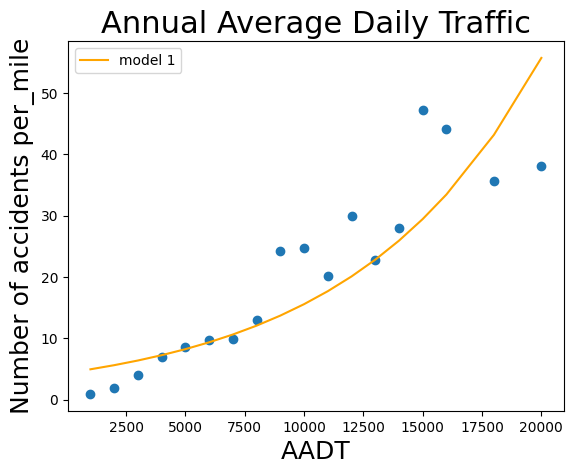

In [92]:
plt.figure()
plt.scatter(new_data['AADT_1000'], new_data['Accidents_per_mile'])
plt.plot(new_data['AADT_1000'], new_data['preds1'], label = 'model 1', color = 'orange')
plt.xlabel('AADT', fontsize = 18)
plt.ylabel('Number of accidents per_mile', fontsize = 18)
plt.title('Annual Average Daily Traffic', fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl">  מודל פואסוני הוא בעיקרו מודל מעריכי. לכן הגרף נראה מעריכי. אך הנתונים נראים יותר ליניארים. נרצה לעשות איזושהי טרנספורמציה על הנתונים כך שנקבל מודל מסוג אחר. 
    ברגרסיה פואסונית שכיח מאד לעשות טרנספורמצית log על המשתנה המסביר.

$$ E[Y_i] = \lambda = Miles * e^{b_0 + b_1 Log(AADT)} =  Miles * e^{b_0}  e^{b_1 Log(AADT)} =  Miles * e^{b_0}  e^{Log(AADT)^{b_1}} =  Miles * e^{b_0} AADT^{ b_1} $$

<div dir="rtl"> זהו גם לא מודל לינארי אבל עבור $b_1$ באיזור 1 כן נקבל מודל ליניארי

In [93]:
model_poisson2 = sm.GLM(new_data['Accidents'], new_data[['intercept', 'log_AADT_1000']], family=sm.families.Poisson(),offset=np.log(new_data['Miles']))  # Poisson regression model
results_poisson2 = model_poisson2.fit()
print(results_poisson2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Accidents   No. Observations:                   18
Model:                            GLM   Df Residuals:                       16
Model Family:                 Poisson   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42.672
Date:                Sat, 28 Oct 2023   Deviance:                       10.978
Time:                        21:20:19   Pearson chi2:                     11.5
No. Iterations:                     5   Pseudo R-squ. (CS):             0.9999
Covariance Type:            nonrobust                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
intercept        -8.4037      1.125     -7.471

<div dir="rtl"> נראה את הערכים של המדדים aic, bic.

In [98]:
results_poisson2.aic, results_poisson2.bic

(89.34420758967754, -35.26766557225192)

In [95]:
new_data['preds2'] = results_poisson2.predict(new_data[['intercept', 'log_AADT_1000']])

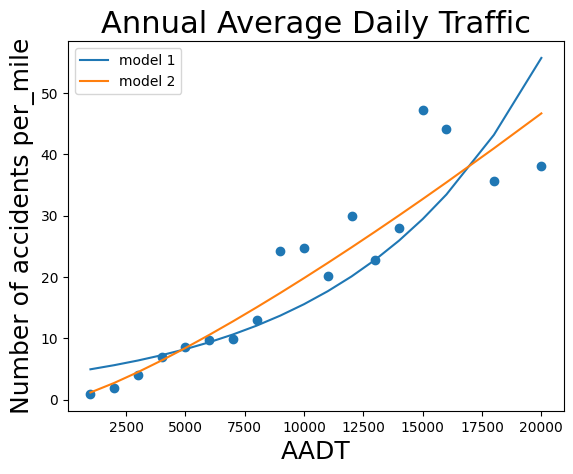

In [96]:
plt.figure()
plt.scatter(new_data['AADT_1000'], new_data['Accidents_per_mile'])
plt.plot(new_data['AADT_1000'], new_data['preds1'], label = 'model 1')
plt.plot(new_data['AADT_1000'], new_data['preds2'], label = 'model 2')
plt.xlabel('AADT', fontsize = 18)
plt.ylabel('Number of accidents per_mile', fontsize = 18)
plt.title('Annual Average Daily Traffic', fontsize = 22)
plt.legend()
plt.show()

<div dir="rtl"> נראה שהמודל החדש יותר טוב. גם לפי המדדים של aic ו- bic שנקבלים ערכים יותר נמוכים. 

In [97]:
results_poisson2.aic, results_poisson2.bic

C:\Users\user\anaconda3\envs\queueing\lib\site-packages\statsmodels\genmod\generalized_linear_model.py:1838: FutureWarning: The bic value is computed using the deviance formula. After 0.13 this will change to the log-likelihood based formula. This change has no impact on the relative rank of models compared using BIC. You can directly access the log-likelihood version using the `bic_llf` attribute. You can suppress this message by calling statsmodels.genmod.generalized_linear_model.SET_USE_BIC_LLF with True to get the LLF-based version now or False to retainthe deviance version.
  warnings.warn(


(89.34420758967754, -35.26766557225192)

<div dir="rtl"> נעשה תחזית עבור קצב התצפיות החזוי עבור ערך 10000 של AADT למייל בודד.

In [104]:
pred_data = pd.DataFrame([])

pred_data.loc[0, 'intercept'] = 1
pred_data.loc[0, 'log_AADT_1000'] = np.log(10000)
pred_data.loc[0, 'Miles'] = 1

In [105]:
results_poisson2.predict(pred_data[['intercept', 'log_AADT_1000']]).item()

19.801336095226333

<div dir="rtl"> כלומר 19.8 תאונות בממוצע למייל בודד